Generating Data


In [20]:
from torchvision.datasets import OxfordIIITPet
import torchvision.transforms as T
from torch.utils.data import DataLoader
import sys
sys.path.append("../")
import torch
from MiniTransformersModels.MiniSegmeationMaskFormer import SegModel
# Images et masques redimensionnés à 128x128
transform = T.Compose([
    T.Resize((32, 32)),
    T.ToTensor()
])
target_transform = T.Compose([
    T.Resize((8,8)),
    T.PILToTensor()
])

train_data = OxfordIIITPet(
    root="./data",
    split="trainval",
    target_types="segmentation",
    download=True,
    transform=transform,
    target_transform=target_transform,
)
def one_hot(vecteur,nclasses):
    return torch.eye(nclasses)[vecteur]
train_data = torch.utils.data.Subset(train_data, range(300))
images=torch.stack([e[0] for e in train_data])
masks=torch.stack([e[1] for e in train_data])
masks=masks.squeeze(1).flatten(1).long()
one_hotmask=one_hot(masks,4).permute(0,2,1)
xtrain=images[:250]
ytrain=one_hotmask[:250]
xtest=images[250:300]
ytest=one_hotmask[250:300]

Trainnig the Model

In [21]:
model=SegModel("adam","Crossentropy",128,10,4,10,32)
train_losses,val_losses,accs,val_accs=model.minibatch_SGD_train(10,xtrain,ytrain,xtest,ytest,batch_size=10,learning_rate=0.001,accuracy=True)

1 | Train Loss: 4.5535 | Val Loss: 1.0628 | Train Acc: 8.05% | Val Acc: 78.88%
2 | Train Loss: 1.1232 | Val Loss: 1.0135 | Train Acc: 77.73% | Val Acc: 80.44%
3 | Train Loss: 1.0754 | Val Loss: 1.0135 | Train Acc: 79.18% | Val Acc: 80.44%
4 | Train Loss: 1.0663 | Val Loss: 1.0135 | Train Acc: 79.42% | Val Acc: 80.44%
5 | Train Loss: 1.0459 | Val Loss: 1.0135 | Train Acc: 79.81% | Val Acc: 80.44%
6 | Train Loss: 1.0459 | Val Loss: 1.0135 | Train Acc: 79.81% | Val Acc: 80.44%
7 | Train Loss: 1.0459 | Val Loss: 1.0135 | Train Acc: 79.81% | Val Acc: 80.44%
8 | Train Loss: 1.0459 | Val Loss: 1.0135 | Train Acc: 79.81% | Val Acc: 80.44%
9 | Train Loss: 1.0459 | Val Loss: 1.0135 | Train Acc: 79.81% | Val Acc: 80.44%
10 | Train Loss: 1.0459 | Val Loss: 1.0135 | Train Acc: 79.81% | Val Acc: 80.44%


ploting the results

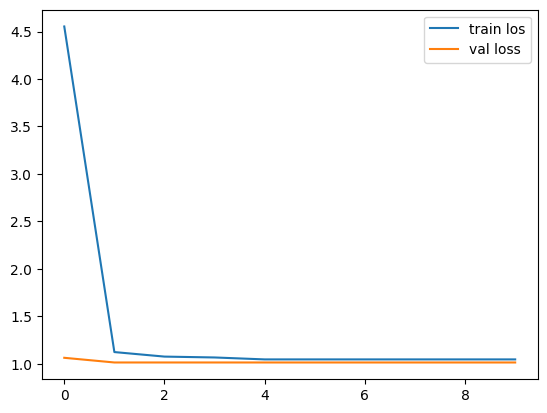

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)),train_losses,label="train los")
plt.plot(range(len(train_losses)),val_losses,label="val loss")
plt.legend()



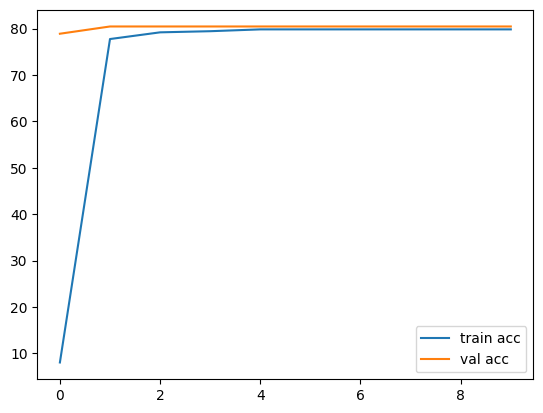

In [23]:
plt.plot(range(len(train_losses)),accs,label="train acc")
plt.plot(range(len(train_losses)),val_accs,label="val acc")
plt.legend()